# Introduction with clear motivation and thesis statement

Carrying too much fat is a condition called obesity, and puts a person at risk for many serious medical conditions including heart disease, diabetes and even certain forms of cancer. In fact, obesity contributes to at least half the chronic diseases in western society. People always relate obesity to overweight, but It is obvious that weight alone is not a clear indicator of good health because it does not distinguish between pounds that come from body fat and those that come from lean body mass or muscle. However, body fat percentage, a value that tells you how much of your body weight is made up of fat, is a good measure of obesity. It plays an important role in various health outcomes such as life expectancy, prognosis for disease, healthcare costs, and the general well-being of individuals.
Many factors such as height can have an impact on body fat, bringing us back to the topic in question: Can we have easy methods of estimating body fat? We now want to come up with a simple, precise, and accurate way of determining body fat percentage of males based on readily available clinical measurements.
 
The commonly available measurements include age, weight, height, bmi, and various body circumference measurements, as can be seen in “BodyFat.txt”. Since percentage of body fat for an individual can be estimated once body density has been determined, we will dismiss the parameter “density” and extract column “BODYFAT” as dependent variables y and other 14 variables as independent variables x.

In [19]:
library(tidyverse)
library(car)
bf_ori<-read.csv("../data/BodyFat.csv")
bf_ori = as.tibble(bf_ori)


# Outliers Detection
First, we do the outlier detection.

From four diagnostic plots, we pick up some possible outliers. By viewing the overall pattern of the data set, we only delete some of them. (Some points are reliable.)

After the detection, we find that 182th observation observes 0 in body fat, which seems impossible. Also, 39th and 42th observations have really abnormal values, One has quite big weight(maybe he is extremely fat, but this won’t happen on normal people) and the other has quite small height, so we regard these two influential points as outliers and dismiss them as unrealistic.

In [20]:
bf = bf_ori %>%
    select(-IDNO, -DENSITY)
bf_df=as.data.frame(bf)
outliers=data.frame(
    "ID"=c(39,42,182),
    "Wrong_variable"=c("WEIGHT","HEIGHT","BODYFAT"),
    "Wrong_data"=c(bf_df[39,"WEIGHT"],bf_df[42,"HEIGHT"],bf_df[182,"BODYFAT"]),
    "min"=c(min(bf_df[,"WEIGHT"]),min(bf_df[,"HEIGHT"]),min(bf_df[,"BODYFAT"])),
    "25%"=c(quantile(bf_df[,"WEIGHT"],.25),quantile(bf_df[,"HEIGHT"],.25),
            quantile(bf_df[,"BODYFAT"],.25)),
    "mean"=c(mean(bf_df[,"WEIGHT"]),mean(bf_df[,"HEIGHT"]),mean(bf_df[,"BODYFAT"])),
    "75%"=c(quantile(bf_df[,"WEIGHT"],.75),quantile(bf_df[,"HEIGHT"],.75),
            quantile(bf_df[,"BODYFAT"],.75)),
    "max"=c(max(bf_df[,"WEIGHT"]),max(bf_df[,"HEIGHT"]),max(bf_df[,"BODYFAT"])))
print(outliers)

   ID Wrong_variable Wrong_data   min   X25.      mean   X75.    max
1  39         WEIGHT     363.15 118.5 159.00 178.92440 197.00 363.15
2  42         HEIGHT      29.50  29.5  68.25  70.14881  72.25  77.75
3 182        BODYFAT       0.00   0.0  12.80  18.93849  24.60  45.10


In [21]:
path = "../data/newbodyfat2.csv"
bf_ori = read.csv(path)
bf_ori = as.tibble(bf_ori)

# Motivation for the model used and statement of the model


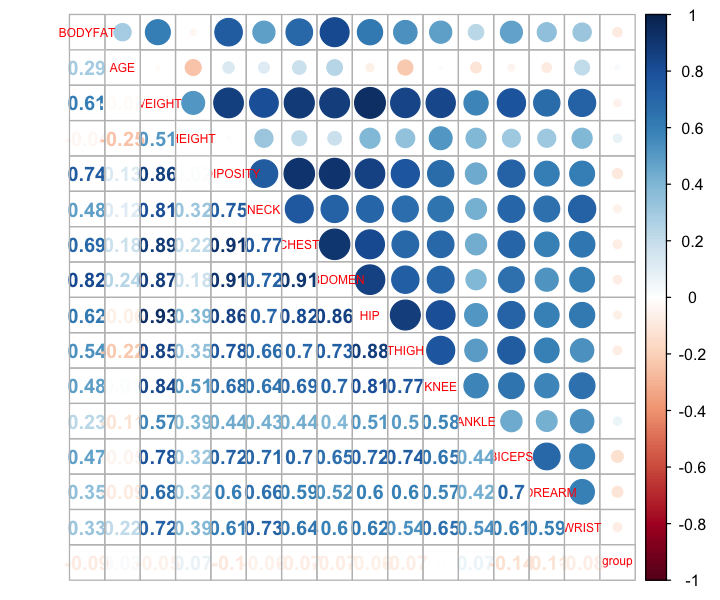

In [22]:
options(repr.plot.width=6, repr.plot.height=5)
library(corrplot)
bf = bf_ori
corrplot.mixed(cor(bf),tl.cex=0.6)

From the correlaton plot above, we find that most of the predictors are highly correlated with body fat. Morever, there exists multilinearity between predictors. So we choose one variable with the highest covariance(ABDOMEN) to fit the linear model and through covariance between BODYFAT and ABDOMEN, we think it is reasonable.

# Summary of final model and related coefficients
Our final model is :
$$\text{Bodyfat}(\%)_i = \beta_0 + \beta_1*\text{Abdomen}_i(\text{cm}) + \epsilon_i,\ \epsilon_i\sim N(0, \sigma^2)$$

Here we include estimated coefficients,standard errors, R^2, p-values and confidence intervals.

In [23]:
bf = bf_ori
model1=lm(BODYFAT~ABDOMEN,data=bf)

print(as.data.frame(summary(model1)$coefficients))


               Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -37.9914133  2.5412430 -14.94993 2.003492e-36
ABDOMEN       0.6158889  0.0273459  22.52217 8.232401e-62


In [24]:
model_information=c(summary(model1)$r.squared,
                    summary(model1)$adj.r.squared,
                    anova(model1)$'Pr(>F)'[1])%>%as.matrix()%>%t()
colnames(model_information)=c("R-square","Adj-R-square","p-value")
print((model_information))

      R-square Adj-R-square      p-value
[1,] 0.6725215    0.6711957 8.232401e-62


In [25]:
print(confint(model1))

                 2.5 %      97.5 %
(Intercept) -42.996683 -32.9861436
ABDOMEN       0.562028   0.6697498


# Laymen’s interpretation 
$\text{Bodyfat}(\%) = -38 + 0.6*\text{Abdomen}(\text{cm})$

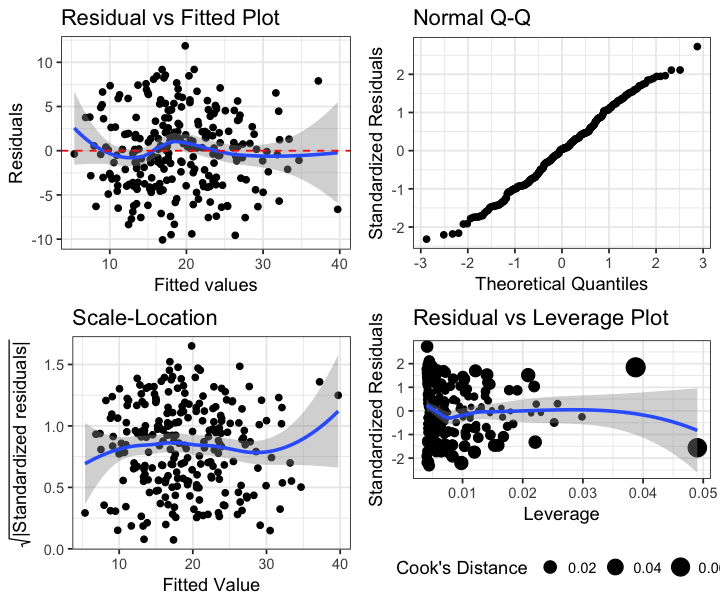

In [26]:
source("../code/diagPlot.R")
plot_total = diagPlot(model1)
grid.arrange(plot_total[[1]], plot_total[[2]], plot_total[[3]],
             plot_total[[5]], ncol=2)

# Check Assumption 
1. It's a linear model.(Obviously from correlation Plot)
2. Residuals seems follow normality from QQ-Plot. 
3. Homoscedasticity is not good.(From residual VS fitted Plot)
4. Independency is not good.(From Scale-Loction Plot)

Info | Final model |P-value | AIC| BIC|CP|PLS|PLS2|Neural Net|Decision Tree
------------ | -------------| ------------- |-------------  | ------| ------| -------------| -------------| -------------| -------------
Variable |1      | 3    | 8    | 5    | 5    | 14(3) | 13(3) | 14| 1
Cross Validation             | 18.993 | 16.310| 15.787| 15.954| 15.734| 17.321 | 17.100 | $\approx 16.4$| 18.993
R square                  |0.673   | 0.726 | 0.743 | 0.735 | 0.737 | - | - | -| 0.673

**run "./code/CV_total.R" to get this table**

# Strength
1. Use only one variable.
2. Easy,Scalable,Robust.
3. R_square is acceptable.
4. Cross_Validation is acceptable.

# Weakness 
1. R_square is a bit smaller.
2. Cross_Validation is relatively larger.

# Conclusion
To sum up, although some of the assumptions(homoscedasticity and independency) may be violated, which may cause our preditions not so precise as others. Predictions of this model are acceptable and extremely easy, scalable, robust to use.